In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from datetime import datetime
from datetime import datetime, timedelta, date

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from datetime import datetime

In [2]:
crypto = pd.read_csv('Bitcoin.csv')
crypto['Date']=pd.to_datetime(crypto['Date'], format="%Y/%m/%d")

In [3]:
crypto.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [4]:
crypto['Date'] = pd.to_datetime(crypto['Date'])
crypto = crypto.set_index('Date')

In [5]:
crypto.isnull().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [6]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2665 entries, 2013-10-01 to 2021-02-25
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2665 non-null   object 
 1   Closing Price (USD)  2665 non-null   float64
 2   24h Open (USD)       2665 non-null   float64
 3   24h High (USD)       2665 non-null   float64
 4   24h Low (USD)        2665 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.9+ KB


In [7]:
crypto = crypto.drop(['Currency'],axis=1)

In [8]:
crypto['avg'] = (crypto['Closing Price (USD)'] + crypto['24h Open (USD)']+ crypto['24h High (USD)']+ crypto['24h Low (USD)'])/4

Get an average of close, open, high, and low

In [9]:
crypto.head()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),daily avg
Date,,,,,
2013-10-01,123.65499,124.30466,124.75166,122.56349,123.818700
2013-10-02,125.45500,123.65499,125.75850,123.63383,124.625580
2013-10-03,108.58483,125.45500,125.66566,83.32833,110.758455
2013-10-04,118.67466,108.58483,118.67500,107.05816,113.248163
2013-10-05,121.33866,118.67466,121.93633,118.00566,119.988828


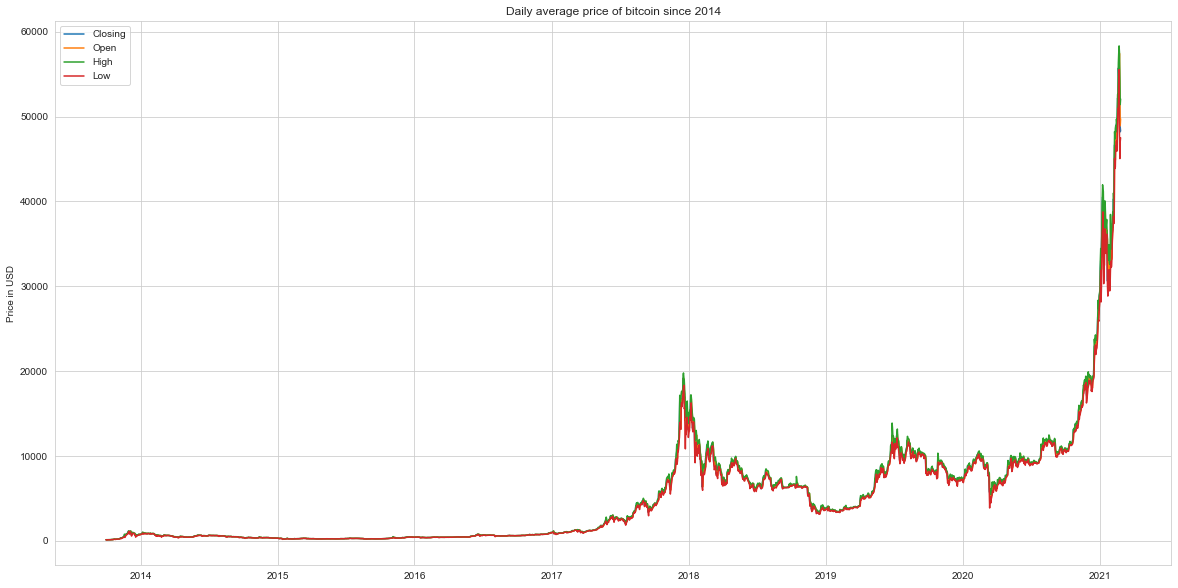

In [10]:
plt.figure(figsize=(20,10))
plt.plot(crypto[['Closing Price (USD)','24h Open (USD)', '24h High (USD)','24h Low (USD)' ]])
plt.ylabel('Price in USD')
plt.title('Daily average price of bitcoin since 2014')
plt.legend(['Closing','Open','High','Low'])

We can see the price of bitcoin is normally the same on close, open, and when it is high and low.

### Moving average of BTC

In [11]:
bitc = crypto[['Closing Price (USD)']]
bitc_ma = bitc.rolling(window=20).mean()

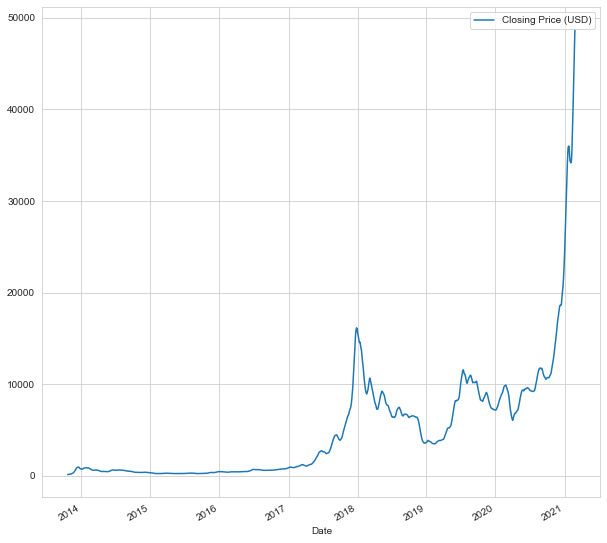

In [12]:
bitc_ma.plot(figsize=(10,10))

The price of bitcoin fluctuates a lot

In [13]:
BTC = crypto.copy()

In [14]:
BTC

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),daily avg
Date,,,,,
2013-10-01,123.654990,124.304660,124.751660,122.563490,123.818700
2013-10-02,125.455000,123.654990,125.758500,123.633830,124.625580
2013-10-03,108.584830,125.455000,125.665660,83.328330,110.758455
2013-10-04,118.674660,108.584830,118.675000,107.058160,113.248163
2013-10-05,121.338660,118.674660,121.936330,118.005660,119.988828
...,...,...,...,...,...
2021-02-21,57128.642606,55913.351445,58332.364616,55531.550703,56726.477343
2021-02-22,54181.914649,57453.358009,57535.863482,47780.749583,54237.971431
2021-02-23,48172.877477,54124.539094,54180.232179,45047.782858,50381.357902


In [50]:
BTC['daily_avg_after_month']=BTC['avg'].shift(-30)
X_BTC = BTC.dropna().drop(['daily_avg_after_month','avg'],axis=1)
y_BTC = BTC.dropna()['daily_avg_after_month']
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.3, random_state=43)
X_forecast_BTC = BTC.tail(30).drop(['daily_avg_after_month','avg'],axis=1)

In [51]:
BTC

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),daily avg,daily_avg_after_month
Date,,,,,,
2013-10-01,123.654990,124.304660,124.751660,122.563490,123.818700,196.262995
2013-10-02,125.455000,123.654990,125.758500,123.633830,124.625580,196.918245
2013-10-03,108.584830,125.455000,125.665660,83.328330,110.758455,197.892248
2013-10-04,118.674660,108.584830,118.675000,107.058160,113.248163,199.856662
2013-10-05,121.338660,118.674660,121.936330,118.005660,119.988828,205.579457
...,...,...,...,...,...,...
2021-02-21,57128.642606,55913.351445,58332.364616,55531.550703,56726.477343,NaN
2021-02-22,54181.914649,57453.358009,57535.863482,47780.749583,54237.971431,NaN
2021-02-23,48172.877477,54124.539094,54180.232179,45047.782858,50381.357902,NaN


In [52]:
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=3),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Bayesian Ridge': BayesianRidge(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
         
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

Different regression methods are used to build a suitable model

In [53]:
print ('Bitcoin')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin
ExtraTrees Regressor
R2: 0.92
MAE: 869.82
MSE: 3584411.78

Random Forest Regressor
R2: 0.91
MAE: 901.40
MSE: 3875087.51

Bayesian Ridge
R2: 0.88
MAE: 1255.80
MSE: 5213661.14

Gradient Boosting Regressor
R2: 0.90
MAE: 959.56
MSE: 4546051.78



Random forest is used for the prediction as it scores best when comparing all methods utilised

In [54]:
def prediction (name, X, y, X_forecast):
    model = RandomForestRegressor(n_estimators=200)
    model.fit(X,y)
    target = model.predict(X_forecast)
    return target

In [55]:
forecast_BTC = prediction('btc',X_BTC, y_BTC, X_forecast_BTC)

In [56]:
last_date = max(crypto.index)
mod_date = last_date + timedelta(days=1)
new_date = pd.date_range(mod_date, periods=30, freq='D')

In [57]:
forecasted_BTC = pd.DataFrame(forecast_BTC, columns=['daily_avg'], index=new_date)

In [58]:
bitcoin = pd.concat([crypto[['avg']], forecasted_BTC])

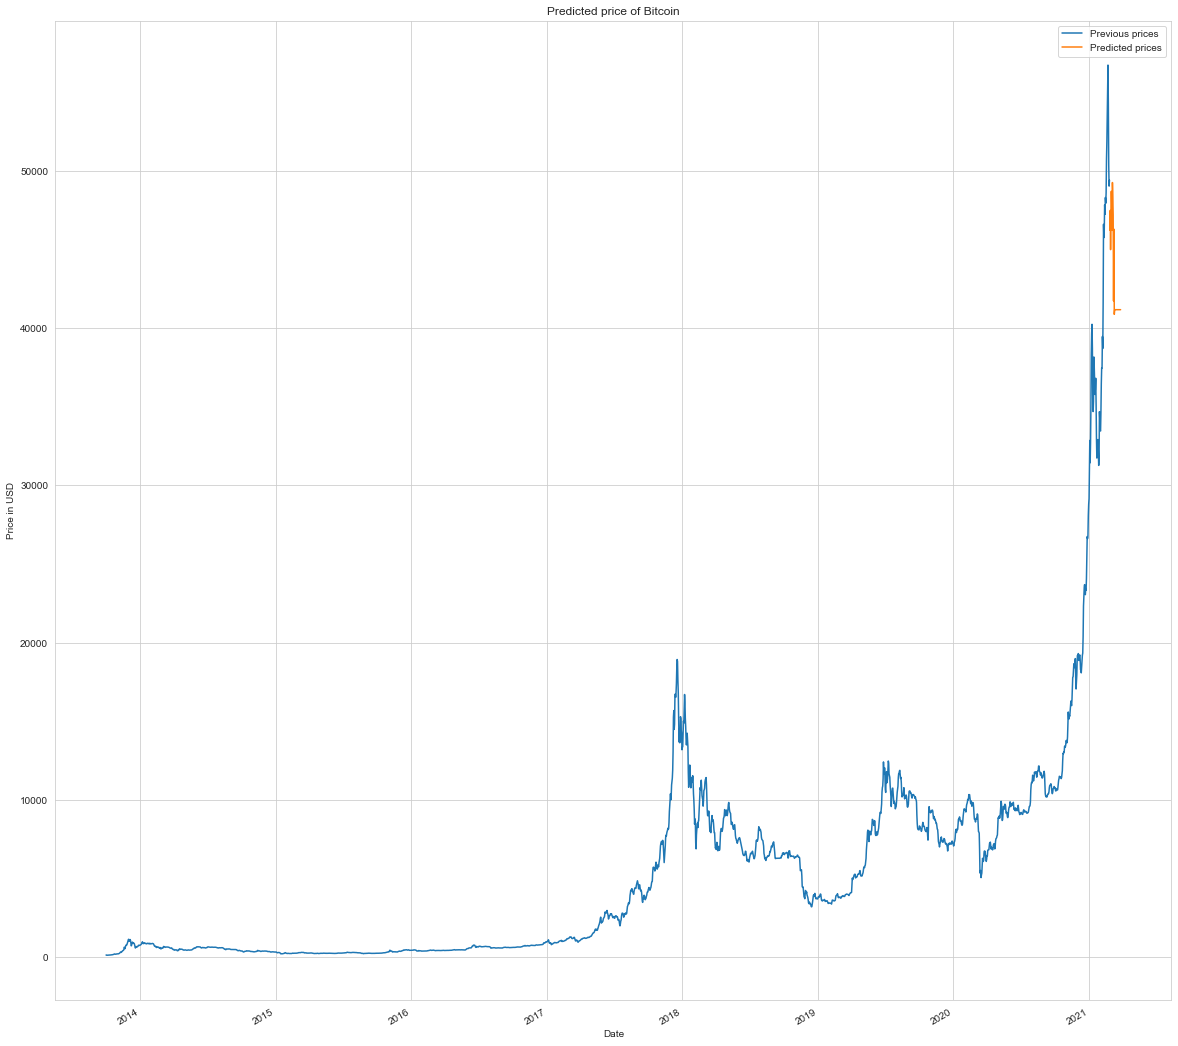

In [59]:
plt.figure(figsize=(20,20))
(bitcoin[:-30]['avg']).plot(label='Previous prices')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted prices')

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title ('Predicted price of Bitcoin')
plt.legend()
plt.show()

The price of bitcoin has successfully been predicted using historical data. Because the price of bitcoin is not stationary and fluctuates a lot - it is nearly impossible to predict it only using historical data. This could be fixed using more complex mthods such as Binary Auto Regressive Tree to perform short term prediction. 
It may be observed that after 11th March 2021, there is a plateau in the predictions.

In [60]:
forecasted_BTC

,daily_avg
2021-02-26,46218.274659
2021-02-27,47480.898826
2021-02-28,44986.896193
2021-03-01,47448.608000
2021-03-02,48699.175894
2021-03-03,47851.316183
2021-03-04,46210.920310
2021-03-05,49255.527641
2021-03-06,48303.521282
2021-03-07,47192.511107


In [61]:
bitcoin

,daily avg,daily_avg
2013-10-01,123.818700,NaN
2013-10-02,124.625580,NaN
2013-10-03,110.758455,NaN
2013-10-04,113.248163,NaN
2013-10-05,119.988828,NaN
...,...,...
2021-03-23,NaN,41168.426694
2021-03-24,NaN,41168.426694
2021-03-25,NaN,41168.426694
2021-03-26,NaN,41168.426694
